In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings('ignore') #ignore the warnings

## GET THE DATA

In [9]:
col = ['user_id', 'item_id','rating','timestamp']
df = pd.read_csv("ml-100k/ml-100k/u.data", sep = '\t', names = col)

In [10]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
df.shape

(100000, 4)

In [16]:
print(df['user_id'].nunique())
print(df['item_id'].nunique())

943
1682


In [22]:
movie = pd.read_csv("D:/python_ML/ml-100k/ml-100k/u.item", sep = '\|', header = None, encoding='latin-1')

In [23]:
movie.head()
# 0 column- movie id or item id
# 1 movie name
# we don't need other columns

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
movie = movie[[0,1]]
movie.columns = ['item_id', 'title']
movie.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [29]:
# Merging both data frames using item_id
df = pd.merge(df,movie,on = "item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Exploratory Data Analysis

In [30]:
sns.set_style('white')

In [31]:
# lets see what's the average rating for all unique movies
df.groupby('title').mean()['rating'].sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [32]:
# it's very rare for any movie to get 5 rating, it maybe the case when vey few have watch that movie so we need to avoid these
# now lets see the the number of viewers for all movies
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [34]:
# better to have a dataframe for these ratings data
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [35]:
ratings.sort_values(by = 'rating', ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


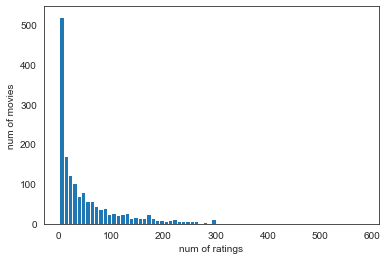

In [39]:
#histogram for num of ratings
plt.hist(ratings['num of ratings'], bins = 70)
plt.xlabel('num of ratings')
plt.ylabel('num of movies')
plt.show()

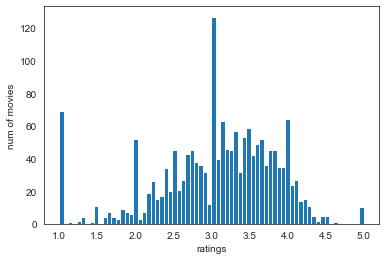

In [40]:
plt.hist(ratings['rating'], bins = 70)
plt.xlabel('ratings')
plt.ylabel('num of movies')
plt.show()

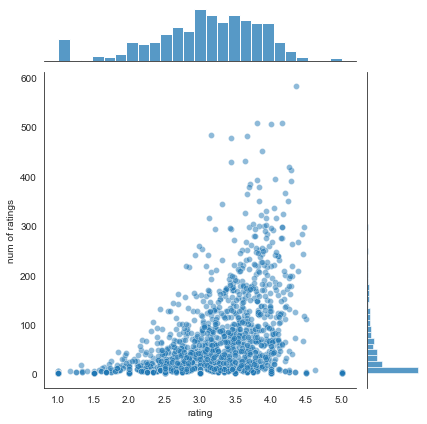

In [42]:
sns.jointplot(x = 'rating', y = 'num of ratings', data = ratings, alpha = 0.5)
#as the rating is increases the num of ratings (watchers) also increases

## CREATING MOVIE RECOMMENDATONS

In [44]:
movieMat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movieMat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


### Predict function

In [51]:
def predict_movies(movieName):
    #extracting movie user rating
    movie_user_rating = movieMat[movieName]
    #creating a dataframe of correlation of that movie with all other movies
    corr_with_movies = pd.DataFrame(movieMat.corrwith(movie_user_rating), columns = ['correlation'])
    #droping rows with NAN
    corr_with_movies.dropna(inplace = True)
    #adding the column 'number of ratings' in corr_with_movies dataframe 
    corr_with_movies = corr_with_movies.join(ratings['num of ratings'])
    #sorting the dataframe by rating but only for those movies which's got more than 100 viewers 
    predictions = corr_with_movies[corr_with_movies['num of ratings']>100].sort_values('correlation', ascending = False)
    return predictions


In [53]:
predict_movies('Titanic (1997)').head()

,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208


## DONE